<img src="./bloch_sphere.png">

In [2]:
import numpy as np
import pandas as pd
import math as m

from qutip import Bloch, basis, Qobj

from qiskit import *
from qiskit.quantum_info import Statevector

In [3]:
# cartesian to spherical coordinate

def cart2sph(x,y,z):
    r = m.sqrt(x**2 + y**2 + z**2)
    theta = m.acos(z/r)
    phi = m.atan2(y,x)
    return r, theta, phi

In [4]:
coor = [0,0,-1]
print("r, theta, phi =", cart2sph(*coor))

r, theta, phi = (1.0, 3.141592653589793, 0.0)


In [5]:
# |0> statevector
sv_0 = Statevector.from_label('0')

# rotation circuit
def rotation(theta, phi):
    qc = QuantumCircuit(1)

    # theta rotation
    qc.ry(theta, 0)
    # phi rotation
    qc.rz(phi, 0)

    return qc

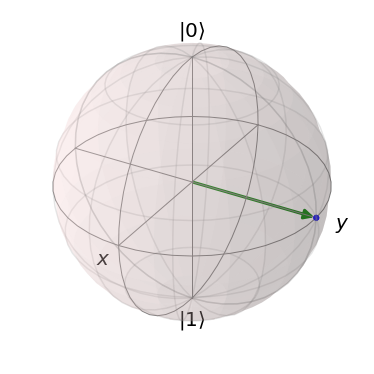

In [6]:
qc = rotation(np.pi/2, np.pi/2)
new_sv = sv_0.evolve(qc)
state = Qobj(new_sv.data)
b = Bloch()
b.add_states(state, kind='point')
b.add_states(state, kind='vector')

b.show()

# Tetrahedron (4 classes)

All combination of $(v_{i},v_{j})$ where $i \neq j$ will result in $|\langle v_{i}|v_{j}\rangle|^2 = (\frac{1}{3})^2 = \frac{1}{9}$

In [6]:
# cartesian coordinate of tetrahedron vertices (inside a unit sphere)

tetra_vecs = [
    [0, 0, 1],
    [np.sqrt(8/9), 0, -1/3],
    [-np.sqrt(2/9), np.sqrt(2/3), -1/3],
    [-np.sqrt(2/9), -np.sqrt(2/3), -1/3],
]

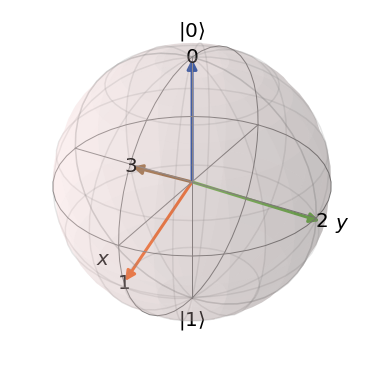

In [7]:
# plot the cartesian coordinate

b_tetra = Bloch()
b_tetra.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(tetra_vecs)):
    b_tetra.add_annotation(tetra_vecs[i], str(i))
    b_tetra.add_vectors(tetra_vecs[i])
    
b_tetra.show()

In [8]:
# transform the cartesian coordinate to spherical coordinate

print("Spherical Coordinate")
print("r, theta, phi")
tetra_angles = []
for i in range(len(tetra_vecs)):
    tetra_angles += [cart2sph(*tetra_vecs[i])]
    print(str(i+1) + ":", tetra_angles[-1])
    
print("Total vertices =", len(tetra_angles))

Spherical Coordinate
r, theta, phi
1: (1.0, 0.0, 0.0)
2: (1.0, 1.9106332362490186, 0.0)
3: (1.0, 1.9106332362490186, 2.0943951023931957)
4: (1.0, 1.9106332362490186, -2.0943951023931957)
Total vertices = 4


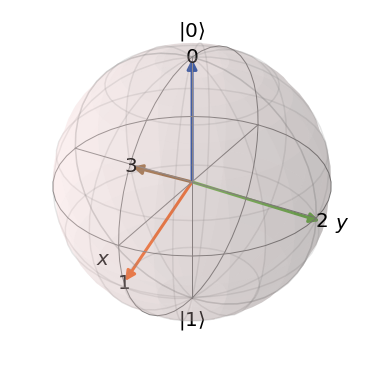

In [9]:
# construct the quantum states for all vertices

tetra_states = np.zeros((4,2), dtype=np.complex_)
b_tetra_states = Bloch()
b_tetra_states.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(tetra_angles)):
    # construct quantum circuit to prepare the vertice's quantum state based on its spherical coordinate
    qc = rotation(tetra_angles[i][1], tetra_angles[i][2])
    # obtain the quantum state (statevector) by applying the circuit to |0>
    new_sv = sv_0.evolve(qc)
    
    # plot the quantum state on a Bloch Sphere
    state = Qobj(new_sv.data)
    b_tetra_states.add_states(state, kind='vector')
    # also plot the annotation based on the cartesian coordinate of the vertices as a sanity check
    b_tetra_states.add_annotation(tetra_vecs[i], str(i))
    
    tetra_states[i, :] = new_sv.data
    
b_tetra_states.show()

In [10]:
# quantum states of the vertices

# saving the numpy array to txt
np.savetxt("./tetra_states.txt", tetra_states)
print("Quantum States")
pd.DataFrame(tetra_states)

Quantum States


,0,1
0,1.000000+0.000000j,0.000000+0.000000j
1,0.577350+0.000000j,0.816497+0.000000j
2,0.288675-0.500000j,0.408248+0.707107j
3,0.288675+0.500000j,0.408248-0.707107j


In [11]:
# construct the true label for each class (vertice) from the quantum states

tetra_class_label = np.zeros((4,4))
for i in range(4):
    temp = np.zeros((4,))
    for j in range(4):
        temp[j] = (abs(tetra_states[i].conjugate()@(tetra_states[j].T)))**2
    
    tetra_class_label[i, :] = temp

# saving the numpy array to txt
np.savetxt("./tetra_class_label.txt", tetra_class_label)
print("Class True Labels")
pd.DataFrame(tetra_class_label)

Class True Labels


,0,1,2,3
0,1.000000,0.333333,0.333333,0.333333
1,0.333333,1.000000,0.333333,0.333333
2,0.333333,0.333333,1.000000,0.333333
3,0.333333,0.333333,0.333333,1.000000


# Square (8 classes)

Similar to the Elongated Square Bipyramid (see below), <br>
but only the 8 Square Vertices, A = ($\pm \frac{L}{2}, \pm \frac{L}{2}, \pm \frac{L}{2}$), <br>
with $\frac{L}{2} = \frac{1}{\sqrt{3}}$.

In [9]:
# cartesian coordinate of Square vertices (inside a unit sphere)

L = 2/np.sqrt(3)
square_vecs = [
    [L/2, L/2, L/2],
    [L/2, L/2, -L/2],
    [L/2, -L/2, L/2],
    [L/2, -L/2, -L/2],
    [-L/2, L/2, L/2],
    [-L/2, L/2, -L/2],
    [-L/2, -L/2, L/2],
    [-L/2, -L/2, -L/2]
]

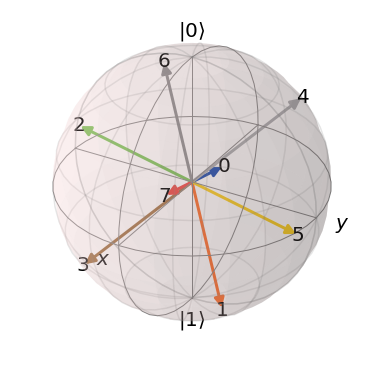

In [10]:
# plot the cartesian coordinate

b_square = Bloch()
b_square.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(square_vecs)):
    b_square.add_annotation(square_vecs[i], str(i))
    b_square.add_vectors(square_vecs[i])
    
b_square.show()

In [11]:
# transform the cartesian coordinate to spherical coordinate

print("Spherical Coordinate")
print("r, theta, phi")
square_angles = []
for i in range(len(square_vecs)):
    square_angles += [cart2sph(*square_vecs[i])]
    print(str(i+1) + ":", square_angles[-1])
    
print("Total vertices =", len(square_angles))

Spherical Coordinate
r, theta, phi
1: (1.0, 0.9553166181245092, 0.7853981633974483)
2: (1.0, 2.1862760354652844, 0.7853981633974483)
3: (1.0, 0.9553166181245092, -0.7853981633974483)
4: (1.0, 2.1862760354652844, -0.7853981633974483)
5: (1.0, 0.9553166181245092, 2.356194490192345)
6: (1.0, 2.1862760354652844, 2.356194490192345)
7: (1.0, 0.9553166181245092, -2.356194490192345)
8: (1.0, 2.1862760354652844, -2.356194490192345)
Total vertices = 8


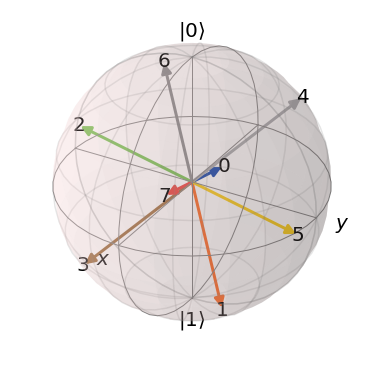

In [12]:
# construct the quantum states for all vertices

square_states = np.zeros((8,2), dtype=np.complex_)
b_square_states = Bloch()
b_square_states.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(square_angles)):
    # construct quantum circuit to prepare the vertice's state based on its spherical coordinate
    qc = rotation(square_angles[i][1], square_angles[i][2])
    # obtain the quantum state (statevector) by applying the circuit to |0>
    new_sv = sv_0.evolve(qc)
    
    # plot the quantum state on a Bloch Sphere
    state = Qobj(new_sv.data)
    b_square_states.add_states(state, kind='vector')
    # also plot the annotation based on the cartesian coordinate of the vertices as a sanity check
    b_square_states.add_annotation(square_vecs[i], str(i))
    
    square_states[i, :] = new_sv.data
    
b_square_states.show()

In [13]:
# quantum states of the vertices

# saving the numpy array to txt
np.savetxt("./square_states.txt", square_states)
print("Quantum States")
pd.DataFrame(square_states)

Quantum States


,0,1
0,0.820473-0.339851j,0.424708+0.175920j
1,0.424708-0.175920j,0.820473+0.339851j
2,0.820473+0.339851j,0.424708-0.175920j
3,0.424708+0.175920j,0.820473-0.339851j
4,0.339851-0.820473j,0.175920+0.424708j
5,0.175920-0.424708j,0.339851+0.820473j
6,0.339851+0.820473j,0.175920-0.424708j
7,0.175920+0.424708j,0.339851-0.820473j


In [14]:
# construct the true label for each class (vertice) from the quantum states

square_class_label = np.zeros((8,8), dtype=np.complex_)
for i in range(8):
    temp = np.zeros((8,))
    for j in range(8):
        temp[j] = (abs(square_states[i].conjugate()@(square_states[j].T)))**2
    
    square_class_label[i, :] = temp

# saving the numpy array to txt
np.savetxt("./square_class_label.txt", square_class_label)
print("Class True Labels")
pd.DataFrame(square_class_label)

Class True Labels


,0,1,2,3,4,5,6,7
0,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.952280e-32+0.000000e+00j
1,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,3.333333e-01+0.000000e+00j
2,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.952280e-32+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j
3,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.939587e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j
4,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j
5,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.952280e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j
6,3.333333e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j
7,3.952280e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j


# Elongated Square Bipyramid (10 classes)

There are 3 types of vertices: <br>
(the coordinate is written in the form of $(x, y, z)$ inside a unit sphere)
1. 8 Square Vertices, A = ($\pm \frac{L}{2}, \pm \frac{L}{2}, \pm \frac{L}{2}$)
2. Top Pyramid Vertices, B = (0, 0, 1)
3. Bottom Pyramid Vertices, C = (0, 0, -1)

with $\frac{L}{2} = \frac{1}{\sqrt{3}}$.

There are several combinations:
1. $|\langle B|C\rangle|^2 = 1$
2. $|\langle B|A\rangle|^2 = |\langle C|A\rangle|^2 = \frac{1}{3}$
3. Several combinations of $|\langle A|A\rangle|^2$

In [12]:
# cartesian coordinate of ESB vertices (inside a unit sphere)

L = 2/np.sqrt(3)
ESB_vecs = [
    [0, 0, 1],
    [0, 0, -1],
    [L/2, L/2, L/2],
    [L/2, L/2, -L/2],
    [L/2, -L/2, L/2],
    [L/2, -L/2, -L/2],
    [-L/2, L/2, L/2],
    [-L/2, L/2, -L/2],
    [-L/2, -L/2, L/2],
    [-L/2, -L/2, -L/2]
]

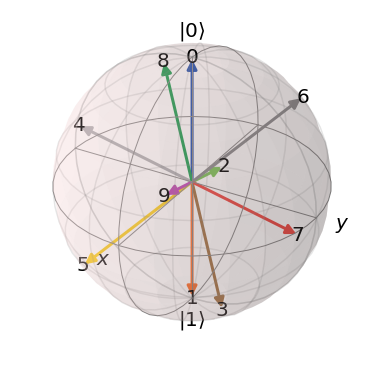

In [13]:
# plot the cartesian coordinate

b_ESB = Bloch()
b_ESB.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(ESB_vecs)):
    b_ESB.add_annotation(ESB_vecs[i], str(i))
    b_ESB.add_vectors(ESB_vecs[i])
    
b_ESB.show()

In [14]:
# transform the cartesian coordinate to spherical coordinate

print("Spherical Coordinate")
print("r, theta, phi")
ESB_angles = []
for i in range(len(ESB_vecs)):
    ESB_angles += [cart2sph(*ESB_vecs[i])]
    print(str(i+1) + ":", ESB_angles[-1])
    
print("Total vertices =", len(ESB_angles))

Spherical Coordinate
r, theta, phi
1: (1.0, 0.0, 0.0)
2: (1.0, 3.141592653589793, 0.0)
3: (1.0, 0.9553166181245092, 0.7853981633974483)
4: (1.0, 2.1862760354652844, 0.7853981633974483)
5: (1.0, 0.9553166181245092, -0.7853981633974483)
6: (1.0, 2.1862760354652844, -0.7853981633974483)
7: (1.0, 0.9553166181245092, 2.356194490192345)
8: (1.0, 2.1862760354652844, 2.356194490192345)
9: (1.0, 0.9553166181245092, -2.356194490192345)
10: (1.0, 2.1862760354652844, -2.356194490192345)
Total vertices = 10


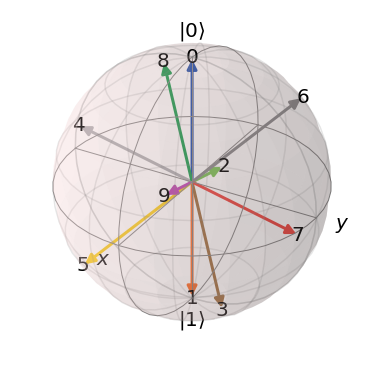

In [15]:
# construct the quantum states for all vertices

ESB_states = np.zeros((10,2), dtype=np.complex_)
b_ESB_states = Bloch()
b_ESB_states.vector_color = [
    '#0039A6',
    '#FF6319',
    '#6CBE45',
    '#996633',
    '#A7A9AC',
    '#FCCC0A',
    '#808183',
    '#EE352E',
    '#00933C',
    '#B933AD'
]

for i in range(len(ESB_angles)):
    # construct quantum circuit to prepare the vertice's state based on its spherical coordinate
    qc = rotation(ESB_angles[i][1], ESB_angles[i][2])
    # obtain the quantum state (statevector) by applying the circuit to |0>
    new_sv = sv_0.evolve(qc)
    
    # plot the quantum state on a Bloch Sphere
    state = Qobj(new_sv.data)
    b_ESB_states.add_states(state, kind='vector')
    # also plot the annotation based on the cartesian coordinate of the vertices as a sanity check
    b_ESB_states.add_annotation(ESB_vecs[i], str(i))
    
    ESB_states[i, :] = new_sv.data
    
b_ESB_states.show()

In [16]:
# quantum states of the vertices

# saving the numpy array to txt
np.savetxt("./ESB_states.txt", ESB_states)
print("Quantum States")
pd.DataFrame(ESB_states)

Quantum States


,0,1
0,1.000000e+00+0.000000e+00j,0.000000+0.000000j
1,6.123234e-17+0.000000e+00j,1.000000+0.000000j
2,8.204732e-01-3.398511e-01j,0.424708+0.175920j
3,4.247082e-01-1.759199e-01j,0.820473+0.339851j
4,8.204732e-01+3.398511e-01j,0.424708-0.175920j
5,4.247082e-01+1.759199e-01j,0.820473-0.339851j
6,3.398511e-01-8.204732e-01j,0.175920+0.424708j
7,1.759199e-01-4.247082e-01j,0.339851+0.820473j
8,3.398511e-01+8.204732e-01j,0.175920-0.424708j
9,1.759199e-01+4.247082e-01j,0.339851-0.820473j


In [17]:
# construct the true label for each class (vertice) from the quantum states

ESB_class_label = np.zeros((10,10), dtype=np.complex_)
for i in range(10):
    temp = np.zeros((10,))
    for j in range(10):
        temp[j] = (abs(ESB_states[i].conjugate()@(ESB_states[j].T)))**2
    
    ESB_class_label[i, :] = temp

# saving the numpy array to txt
np.savetxt("./ESB_class_label.txt", ESB_class_label)
print("Class True Labels")
pd.DataFrame(ESB_class_label)

Class True Labels


,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00+0.000000e+00j,3.749399e-33+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j
1,3.749399e-33+0.000000e+00j,1.000000e+00+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j
2,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.952280e-32+0.000000e+00j
3,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,3.333333e-01+0.000000e+00j
4,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.952280e-32+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j
5,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.939587e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j
6,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j
7,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.952280e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j
8,7.886751e-01+0.000000e+00j,2.113249e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,3.939587e-32+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,1.000000e+00+0.000000e+00j,6.666667e-01+0.000000e+00j
9,2.113249e-01+0.000000e+00j,7.886751e-01+0.000000e+00j,3.952280e-32+0.000000e+00j,3.333333e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,3.333333e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,6.666667e-01+0.000000e+00j,1.000000e+00+0.000000e+00j
